<h1 style="font-size:60px; 
           color:green;
           text-align:center">
    INGENIERÍA DE ATRIBUTOS Y SELECCIÓN DE VARIABLES</h1>

# Table of Contents

* [__Problematica 0__](#chapter1)
* [__Consigna 1__](#section_1)
* [__Librerias 2__](#section_2)
* [__Carga de datos 3__](#section_3)
* [__Creación del dataframe 4__](#section_4)
* [__Data wrangling 5__](#section_5)
    * [__Limpieza 5.1__](#section_5_1)
* [__Feature selection 6__](#section_6)
* [__Machine learning 7__](#section_7)
    * [__Preparación de datos 7.1__](#section_7_1)
    * [__Preparación del modelo 7.2__](#section_7_2)
        * [__Arbol de desiciones 7.2.1__](#section_7_2_1)
        * [__Regresion logistica 7.2.2__](#section_7_2_2)
        * [__Evaluación de modelos 7.3__](#section_7_3)   
* [__Observaciones 8__](#section_8)
* [__Futuras lineas 9__](#section_9)




---

# 0. Problematica 

Continuaremos hablando sobre lo trabajado en el desafío “Ingeniería de atributos y selección de variables”. Crearás un notebook donde se utilizará uno de los modelos de ML utilizados con las mismas variables que en el desafío anterior pero aplicando métodos de validación cruzada. Con esto, se podrán identificar razones por las cuales hay o no mejoras en el desempeño del modelo de ML. 

# 1. Consigna 

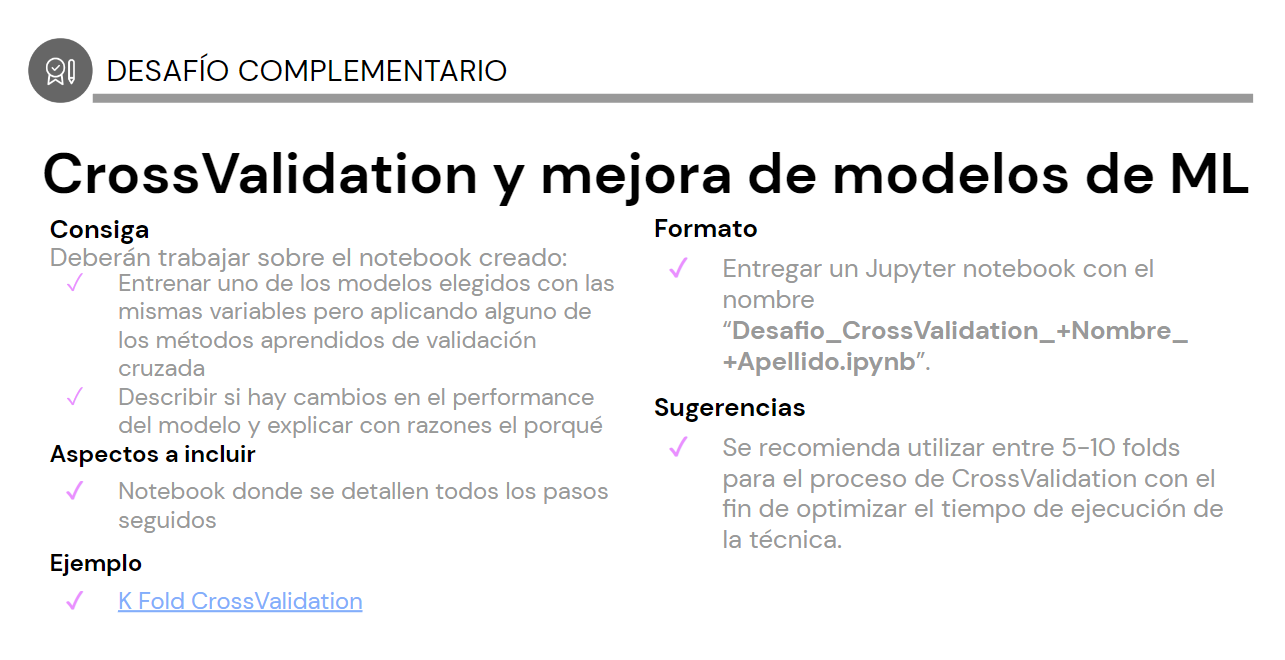

## Librerias 2

In [1]:
# Para trabajar los datos
import json
import requests
import pandas as pd
import numpy as np
from dotenv import load_dotenv
import os 

# Para eliminar los carteles warnings
import warnings as wn

# Para datos faltantes
import missingno as msno

# Importamos las librerias para realizar los graficos
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Importamos las librerias para machine learning
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# Para el arbol de desiciones
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Para la regresion logistica
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn import metrics

# Para el random forest
from sklearn.ensemble import RandomForestRegressor

# Para medir el tiempo
import time

# Para medir los modelos
from sklearn.metrics import mean_squared_error, precision_score

# Para hayar la carga de las variables 
from sklearn.decomposition import PCA

# Para realizar el modelado por loocv
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score

## Carga de datos 3

In [2]:
# Cargamos todos los dataframe desde los csv para trabajar de manera mas eficaz la promixa
information = pd.read_csv('data/information.csv')
maestrias_campeones = pd.read_csv('data/maestrias_campeones.csv')
informacion_campeones = pd.read_csv('data/informacion_campeones.csv')
id_partidas = (pd.read_csv('data/id_partidas.csv'))['lista'].tolist()
games_information = pd.read_csv('data/games_information.csv')
challenges_data = pd.read_csv('data/challenges_data.csv')
df_games = pd.read_csv('data/df_games.csv')

C:\Users\herne\AppData\Local\Temp\ipykernel_13404\2799268752.py:8: DtypeWarning: Columns (106) have mixed types. Specify dtype option on import or set low_memory=False.
  df_games = pd.read_csv('data/df_games.csv')


## Creacion del dataframe 4

Creamos un funcion que nos devuelva los datos para un jugador en especifico.

In [3]:
######################################################################################
######################################################################################

# Definimos algunos datos que vamos a definir para trabajar
def historial_del_jugador(nombre_jugador:str)->pd.DataFrame:
    # Extraemos el id del jugador
    id_del_jugador = df_games[df_games['summonerName'] == nombre_jugador]['summonerId'].unique().item()
    
    # Ahora con el id nos quedamos unicamente con las partidas que deseamos
    historial_partidas = df_games[df_games['summonerId'] == id_del_jugador]
    
    return historial_partidas

######################################################################################
######################################################################################

In [4]:
games_from_GCDariusBrando = df_games[df_games['summonerId'] == 'K2twAA5gA-gMXY4YVq0szKaX-er9Hlhz8sitMu4lzN00Qw']
# games_from_GCDariusBrando.to_csv('testeo.csv', index=False)

In [6]:
games_from_GCDariusBrando.head()

,index,assists,baronKills,bountyLevel,champExperience,champLevel,championId,championName,championTransform,consumablesPurchased,...,killAfterHiddenWithAlly,killedChampTookFullTeamDamageSurvived,knockEnemyIntoTeamAndKill,pickKillWithAlly,saveAllyFromDeath,survivedThreeImmobilizesInFight,tookLargeDamageSurvived,takedownsFirstXMinutes,killingSprees_y,playedChampSelectPosition
5,5,8,0,0,12785,14,36,DrMundo,0,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,0,8,0,1,13323,15,122,Darius,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25,5,11,0,4,12193,14,36,DrMundo,0,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35,5,11,0,2,15230,16,36,DrMundo,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40,0,3,0,0,9350,12,36,DrMundo,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 5. Data wrangling 

## Limpieza 5.1

Dada la cantidad de valores nulos que tenemos podemos optar por los siguientes procesos. Como la mayoria de valores nulos exeden el 50% de la muestra, lo mejor que podremos hacer para estos casos es eliminar las columna del analisis. Esto se debe a que el historial de datos que estamos tomando es muy antiguo por lo que los datos que se van almacenando varias. Si deseamos realziar el mismo analisis pero con lapsos de tiempo mas corto, tranquilamente podriammos tomar el historial de una cantidad de partidas X con el cual podriamos trabajar de otra manera estos valores. En el caso de la columna _inhibitorTakedowns_ reemplazaremos los valores nulos con un 0 unicamente al ser un porcentaje chico de la muestra

In [5]:
# Contemos la cantidad de valores nulos que poseemos en algunas columnas

columnas = ['riotIdName','riotIdTagline','inhibitorTakedowns','basicPings','allInPings','abilityUses']

for columna in columnas:
    
    # Vemos el listado de columnas y nos diga la cantidad de nulos
    print(f'La cantidad de filas nulas en la columna {columna} es de un total de', df_games[columna].isnull().sum())
    

# vemos desde que columna hasta cual hay que eliminar
print(df_games.columns.get_loc('eligibleForProgression'))
print(df_games.columns[250])

# Eliminamos las columnas de mayor cantidad
df_games.drop(df_games.columns[106:251], axis=1, inplace=True)

# Eliminamos las columnas que estan completamente vacias
df_games.drop(columns=['riotIdName', 'riotIdTagline'], inplace=True)

# Rellenamos las columnas que nos quedan con valores igual a 0
df_games.fillna(0)

print('Se finalizo el proceso de limpieza')


# Calculamos el promedio de cada una de estas columnas
# Selecionamos las columnas a trabajar
columns = ['inhibitorTakedowns','nexusTakedowns', 'turretTakedowns_x']

# Realizamos el bucle para estas columnas
for col in columns:
    
    # Calculamos el promedio de la col
    prom_col = round(df_games[col].mean(), 0)
    
    # Reemplazamos los NaN con estos valores
    df_games[col].fillna(prom_col, inplace=True)
    
print("Perfect: Se finalizaso el proceso de reemplazo de nulos!")

La cantidad de filas nulas en la columna riotIdName es de un total de 7220
La cantidad de filas nulas en la columna riotIdTagline es de un total de 7220
La cantidad de filas nulas en la columna inhibitorTakedowns es de un total de 120
La cantidad de filas nulas en la columna basicPings es de un total de 5360
La cantidad de filas nulas en la columna allInPings es de un total de 5690
La cantidad de filas nulas en la columna abilityUses es de un total de 4690
106
playedChampSelectPosition
Se finalizo el proceso de limpieza
Perfect: Se finalizaso el proceso de reemplazo de nulos!


Como podemos observar siguen quedando datos nulos en aquellas columnas en donde tengamos un valor igual a 1.

Veamos un poco sobre estas mismas y veamos que tantos valores nos quedan asi vemos como los podemos trabajar.

# 6. Feature selection 

## Encoding de variables & limpieza

Para este segundo criterio de selección de los datos, emplearemos el razonamiento que pudimos intuir del EDA realizado en pasos anteriores.

In [6]:
## Creamos una funcion que nos categorice los valores del kda de un jugador.

def categorizar_kda(valor:int)->pd.DataFrame:
    # Definimos los valores para la funcion
    if valor < 0.5:
        # Si el kda es menor a 0,5 que sea muy malo
        return 'muy_malo'

    elif valor < 1:
        # Si kda es menor a 1 es malo
        return 'malo'

    elif valor < 3:
        # kda menor a 3 normal
        return 'normal'

    elif valor < 6:
        # kda menor a 6 bueno
        return 'bueno'

    elif valor >= 6:
        #kda superior a 6 es muy bueno
        return 'muy_bueno'
    
################################################################################################################
################################################################################################################

## Creamos una funcion para categorizar los valores del farmxmin de un jugador.

def categorizar_farmxmin(valor:int)->pd.DataFrame:
    # Definimos los valores para cada categoria
    if valor < 2:
        # Farm menor a 2 es malo
        return 'malo'
    
    elif valor < 5:
        # Farm menor a 5 pero mayor que 2 es normal
        return 'normal'
    
    elif valor < 8:
        # Farm menor a 8 pero mayor que 5 es bueno
        return 'bueno'
    
    elif valor >= 8:
        # Farm mayor a 8 es muy bueno
        return 'muy_bueno'

In [7]:
# Reemplazamos las partidas en donde murieron 0 veces por un 1
df_games['deaths'] = df_games['deaths'] + 1

# Crearemos las columans extras para el analisis que agregan valor
df_games['kda'] = (df_games['kills'] + df_games['assists'])/df_games['deaths']

# Creamos la segunda columna de interes
df_games['farm_min'] = df_games['totalMinionsKilled']/(df_games['timePlayed']/60)

# Categorizamos los valores para el kda en 5 categorias
df_games['kda_level'] = df_games['kda'].apply(categorizar_kda)

# Categorizamos el farm x min en 4 categorias
df_games['farm_min_level'] = df_games['farm_min'].apply(categorizar_farmxmin)

# Seleccionamos las las variables mas importantes en este tercer modelo
variables3 = ['kda', 'baronKills', 'champExperience', 'damageDealtToBuildings', 'damageDealtToObjectives', 'farm_min', 'dragonKills',
           'firstBloodKill', 'goldEarned', 'physicalDamageDealtToChampions', 'totalMinionsKilled', 
           'firstTowerKill', 'teamPosition', 'totalDamageDealtToChampions', 'visionScore','kda_level','farm_min_level', 'win']


# Nos quedamos con las variables más importantes y las definimos en un df train 
# df_for_testing = df_games[variables]
games_from_GCDariusBrando = historial_del_jugador('GC LDCGOD')
df_for_testing = games_from_GCDariusBrando[variables3]

# Hay que hacer el encoding de 4 variables
# Definimos el modelo
le = preprocessing.LabelEncoder()

# Realizamos el encoding
columnas = ['firstBloodKill', 'firstTowerKill', 'teamPosition', 'win', 'kda_level','farm_min_level']
for columna in columnas:
    
    # Empleamos el modelo
    le.fit(df_for_testing[columna]) 
    list(le.classes_)

    # transformamos las variables
    df_for_testing[columna] = le.transform(df_for_testing[columna])
    # list(le.inverse_transform(df_for_testing['teamPosition']))    
    
    wn.filterwarnings('ignore')
    
    # wn.filterwarnings('ignore')

C:\Users\herne\AppData\Local\Temp\ipykernel_13404\2019468229.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_for_testing[columna] = le.transform(df_for_testing[columna])


# 7. Machine learning | Validacion simple

## Preparacion de datos 7.1

In [8]:
# Definimos las columnas que seran el x e y
y_cols = ['win']


# Definimos el cuarto modelo para x
x_cols3 = ['kda', 'baronKills', 'champExperience', 'damageDealtToBuildings', 'damageDealtToObjectives', 'farm_min', 'dragonKills',
           'firstBloodKill', 'goldEarned', 'physicalDamageDealtToChampions', 'totalMinionsKilled', 
           'firstTowerKill', 'teamPosition', 'totalDamageDealtToChampions', 'visionScore','kda_level','farm_min_level']


# Definimos las variables x y las y 
Y = df_for_testing[y_cols]
X = df_for_testing[x_cols3]

# Definimos los datos de entrenamiento
x_train, x_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size = 0.30, ## Definimos el tamaño de los datos que vamos a emplear
                                                    random_state = 50)


## Preparación del modelo 7.2

In [9]:
## Definimos todos los modelos con sus respectivos parametros que vamos a implementar
# Arbol de desiciones
dtc = DecisionTreeClassifier(max_depth=3,
                            random_state=20)

# Resgresion logistica
lr = LogisticRegression(solver='sag',
                         penalty='l2',
                         multi_class='ovr')

# Random forest
rfr = RandomForestRegressor(n_estimators=100, random_state=1)

# Definimos los modelos
modelos = [dtc, lr]

## Evaluación del modelo 7.3

#######################################################################
El modelo que usaremos a continuacion es DecisionTreeClassifier(max_depth=3, random_state=20) ->
#######################################################################
El accuracy del modelo sobre los datos de entrenamiento es: 0.8693069306930693
El accuracy del modelo sobre los datos de entrenamiento es: 0.783410138248848
La presicion del modelo es: 0.7090909090909091
El MSE del modelo es de: 0.21658986175115208
El tiempo de procesado es =  0.029920339584350586


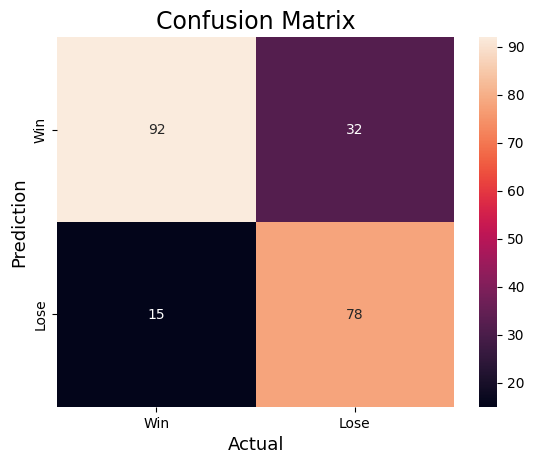

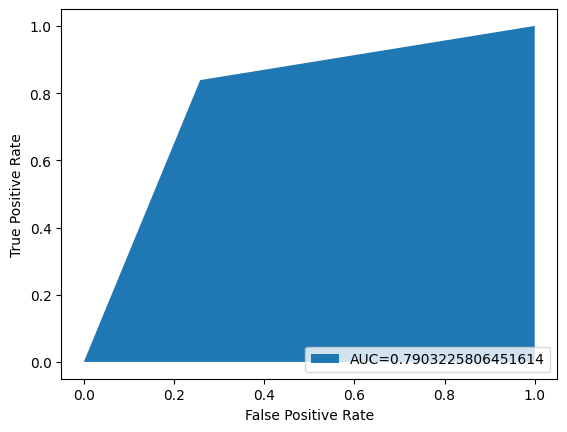

#######################################################################
El modelo que usaremos a continuacion es LogisticRegression(multi_class='ovr', solver='sag') ->
#######################################################################
El accuracy del modelo sobre los datos de entrenamiento es: 0.7702970297029703
El accuracy del modelo sobre los datos de entrenamiento es: 0.7788018433179723
La presicion del modelo es: 0.7227722772277227
El MSE del modelo es de: 0.22119815668202766
El tiempo de procesado es =  0.028900623321533203


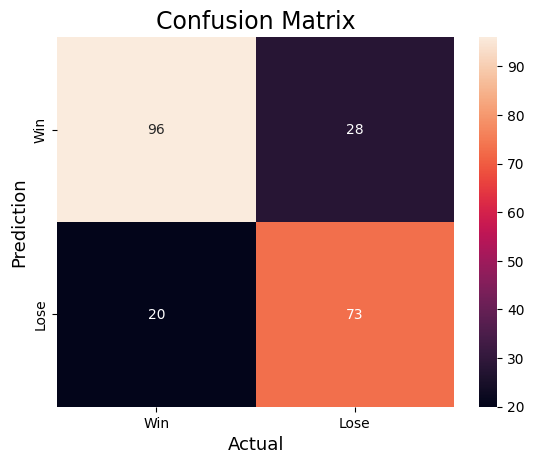

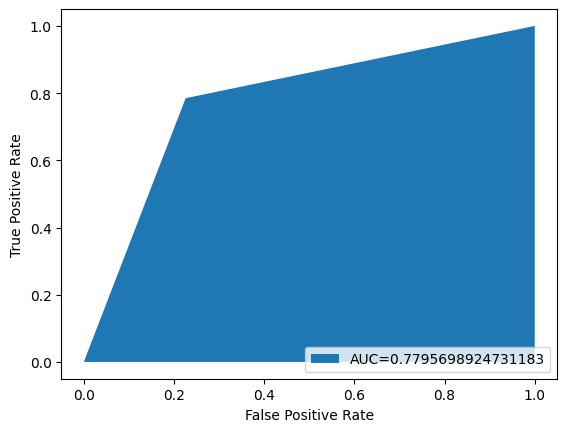

In [10]:
# Crearemos un bucle for que evalue cada uno de los modelos por separados para saber cual de todos ellos es el mejor para nuestro modelo.

for modelo in modelos:
    
    print(f'#######################################################################')
    print(f'El modelo que usaremos a continuacion es {modelo} ->')
    print(f'#######################################################################')

    # Que arranque el tiempo
    start_time = time.time()
    
    # Definimos con que entrenar los modelos
    modelo.fit(x_train, y_train)
    
    # Definimos el valor de prediccion
    y_train_pred = modelo.predict(x_train)
    y_pred = modelo.predict(x_test)
    
    # Evaluamos la accuracy  del modelo sobre los valores de entrenamiento
    accuracy = accuracy_score(y_train, y_train_pred)
    print(f'El accuracy del modelo sobre los datos de entrenamiento es: {accuracy}')
    
    # Ahora evaluamos sobre los de testeo
    accuracy = accuracy_score(y_test, y_pred)
    print(f'El accuracy del modelo sobre los datos de entrenamiento es: {accuracy}')
    
    # Evaluamos la presicion del modelo
    precision = precision_score(y_test, y_pred)
    print(f'La presicion del modelo es: {precision}')

    # Empleamos el MSE y el r2 para medir la efectividad del modelo
    # MSE
    mse = mean_squared_error(y_true=y_test, y_pred=y_pred)
    end_time = time.time()
    
    # Imprimimos los valores
    print(f'El MSE del modelo es de: {mse}')    
    print('El tiempo de procesado es = ', end_time-start_time) 
    
    # Creamos la matriz de confusión
    cm = confusion_matrix(y_test, y_pred)

    # Graficamos la matriz de confusión
    sns.heatmap(cm,
                annot=True,
                fmt='g',
                xticklabels=['Win', 'Lose'],
                yticklabels=['Win', 'Lose'])
    plt.ylabel('Prediction',fontsize=13)
    plt.xlabel('Actual',fontsize=13)
    plt.title('Confusion Matrix',fontsize=17)
    plt.show()

    # Definimos los valores
    fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)
    auc = metrics.roc_auc_score(y_test, y_pred)

    #create ROC curve
    plt.fill_between(fpr,tpr,label="AUC="+str(auc))
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.legend(loc=4)
    plt.show()

In [11]:
# Que inicie el tiempo
start_time = time.time()
    
# Definimos con que entrenar los modelos
rfr.fit(x_train, y_train)

# Definimos el valor de prediccion
y_train_pred = rfr.predict(x_train)
y_pred = rfr.predict(x_test)

# Empleamos el MSE y el r2 para medir la efectividad del modelo
# MSE
mse = mean_squared_error(y_true=y_test, y_pred=y_pred)

# Intentamos obtener algun dato mas ademas del eror cuadrado
score = rfr.score(x_test, y_test)

# Que termine el tiempo
end_time = time.time()

# Imprimimos los valores
print(f'El MSE del modelo es de: {mse}')
print(f'El accuracy promedio del modelo es de: {score}')
print('El tiempo de procesado es = ', end_time-start_time) 

El MSE del modelo es de: 0.13835852534562212
El accuracy promedio del modelo es de: 0.43503602150537624
El tiempo de procesado es =  0.39719581604003906


## Carga de las variables más importantes 7.4

In [12]:
pca = PCA()

# Aplicamos el pca sobre nuestras variables
X_train = pca.fit_transform(x_train)
X_test = pca.transform(x_test)

# Analizamos la varianza
explained_variance = pca.explained_variance_ratio_
explained_variance

array([6.67277544e-01, 2.09284527e-01, 8.17438963e-02, 2.23785130e-02,
       1.69304778e-02, 2.37977429e-03, 5.15287598e-06, 8.78748767e-08,
       1.28905957e-08, 5.36307354e-09, 2.83807377e-09, 2.52118908e-09,
       1.12416767e-09, 8.28596994e-10, 3.01033227e-10, 2.60173738e-10,
       2.02054369e-10])

En base a lo que observamos en los valores de arriba, vemos que el primer componente es responsable del 66% de la varianza. De manera similar, el segundo componente compone el 20,9% de la varianza. Tanto el primero como el segundo son los valores más altos que podemos encontrar dentro de nuestro modelo. Solo estos dos componentes, constituyebn un 86,9&% de la varianza dandonos a enteder que gran parte de la variacion del modelo se debe a estos dos.

Por el lado contrario vemos que los ultimos 10 componentes tienen  un peso muy bajo en la varianza de nuestro modelo. De esta forma podemos observar que sin ellas, el modelo no se veria tan afectado.

In [13]:
# Emplearemos un modelo en base a esta informacion
pca = PCA(n_components=2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# Crearemos un modelo de regrasion logistica
lr = LogisticRegression(solver='sag',
                         penalty='l2',
                         multi_class='ovr')
lr.fit(X_train, y_train)

# Creamos una prediccion
y_pred = lr.predict(X_test)

# Calculamos la accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'El accuracy del modelo es: {accuracy}')

# Calculamos la presicion
precision = precision_score(y_test, y_pred)
print(f'La presicion del modelo es: {precision}')

El accuracy del modelo es: 0.7142857142857143
La presicion del modelo es: 0.6781609195402298


Unicamente con el uso de 2 componentes obtenemos una precision del 71,4% lo cual es bastante bueno considerando la cantidad de componentes que ingresamos en el modelo.

# 8. Machine Learning | LOOCV

## Preparación de datos 8.1 

In [14]:
# Definimos las columnas que seran el x e y
y_cols = ['win']

# Definimos el cuarto modelo para x
x_cols3 = ['kda', 'baronKills', 'champExperience', 'damageDealtToBuildings', 'damageDealtToObjectives', 'farm_min', 'dragonKills',
           'firstBloodKill', 'goldEarned', 'physicalDamageDealtToChampions', 'totalMinionsKilled', 
           'firstTowerKill', 'teamPosition', 'totalDamageDealtToChampions', 'visionScore','kda_level','farm_min_level']

# Definimos las variables x y las y 
Y = df_for_testing[y_cols]
X = df_for_testing[x_cols3]

cv = LeaveOneOut()

## Preparación de modelos 8.2

In [15]:
## Definimos todos los modelos con sus respectivos parametros que vamos a implementar
# Arbol de desiciones
dtc = DecisionTreeClassifier(max_depth=3,
                            random_state=20)

# Resgresion logistica
lr = LogisticRegression(solver='sag',
                         penalty='l2',
                         multi_class='ovr')

# Random forest
rfr = RandomForestRegressor(n_estimators=100, random_state=1)

# Definimos los modelos
modelos = [dtc, lr]

## Evaluación de modelos 8.3

In [16]:
# Crearemos un bucle for que evalue cada uno de los modelos por separados para saber cual de todos ellos es el mejor para nuestro modelo.

for modelo in modelos:
    
    print(f'#######################################################################')
    print(f'El modelo que usaremos a continuacion es {modelo} ->')
    print(f'#######################################################################')

    # Que arranque el tiempo
    start_time = time.time()
    
    # Evaluamos los modelos
    score = cross_val_score(modelo, X, Y, scoring='accuracy', cv=cv, verbose=1)
    
    # Termina el timepo
    end_time = time.time()
    total_time = end_time - start_time
    
    # Calculamos el primedio del score y el desviacion estandar
    mean_score = np.mean(score).round(2)
    std_score = np.std(score).round(2)
    
    # Vemos el performance de los modelos 
    print(f'El Accuracy del modelo es -> {mean_score}; su std es -> ({std_score})')
    print(f'El tiempo de procesamiento es: {total_time}')

#######################################################################
El modelo que usaremos a continuacion es DecisionTreeClassifier(max_depth=3, random_state=20) ->
#######################################################################


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 722 out of 722 | elapsed:    6.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


El Accuracy del modelo es -> 0.81; su std es -> (0.39)
El tiempo de procesamiento es: 6.631332635879517
#######################################################################
El modelo que usaremos a continuacion es LogisticRegression(multi_class='ovr', solver='sag') ->
#######################################################################
El Accuracy del modelo es -> 0.76; su std es -> (0.42)
El tiempo de procesamiento es: 15.73534870147705


[Parallel(n_jobs=1)]: Done 722 out of 722 | elapsed:   15.6s finished


In [17]:
# Que inicie el tiempo
start_time = time.time()
    
# Evaluamos los modelos
score = cross_val_score(rfr, X, Y, scoring='accuracy', cv=cv, verbose=1)

# Termina el timepo
end_time = time.time()
total_time = end_time - start_time

# Calculamos el primedio del score y el desviacion estandar
mean_score = np.mean(score).round(2)
std_score = np.std(score).round(2)

# Vemos el performance de los modelos 
print(f'El Accuracy del modelo es -> {mean_score}; su std es -> ({std_score})')
print(f'El tiempo de procesamiento es: {total_time}')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


El Accuracy del modelo es -> nan; su std es -> (nan)
El tiempo de procesamiento es: 373.28758454322815


[Parallel(n_jobs=1)]: Done 722 out of 722 | elapsed:  6.2min finished


# 9. Cross Validation

## Preparacion de los datos 9.1

In [28]:
# Definimos las columnas que seran el x e y
y_cols = ['win']

# Definimos el cuarto modelo para x
x_cols3 = ['kda', 'baronKills', 'champExperience', 'damageDealtToBuildings', 'damageDealtToObjectives', 'farm_min', 'dragonKills',
           'firstBloodKill', 'goldEarned', 'physicalDamageDealtToChampions', 'totalMinionsKilled', 
           'firstTowerKill', 'teamPosition', 'totalDamageDealtToChampions', 'visionScore','kda_level','farm_min_level']

# Definimos las variables x y las y 
Y = df_for_testing[y_cols]
X = df_for_testing[x_cols3]

## Preparacion de modelos 9.2

In [29]:
## Definimos todos los modelos con sus respectivos parametros que vamos a implementar
# Arbol de desiciones
dtc = DecisionTreeClassifier(max_depth=3,
                            random_state=20)

# Resgresion logistica
lr = LogisticRegression(solver='sag',
                         penalty='l2',
                         multi_class='ovr')

# Random forest
rfr = RandomForestRegressor(n_estimators=100, random_state=1)

# Definimos los modelos
modelos = [dtc, lr]

## Evaluacion de los modelos 9.3

In [30]:
# Crearemos un bucle for que evalue cada uno de los modelos por separados para saber cual de todos ellos es el mejor para nuestro modelo.

for modelo in modelos:
    
    print(f'#######################################################################')
    print(f'El modelo que usaremos a continuacion es {modelo} ->')
    print(f'#######################################################################')

    # Que arranque el tiempo
    start_time = time.time()
    
    # Definimos con que entrenar los modelos
    modelo.fit(x_train, y_train)
    
    # Definimos el valor de prediccion
    y_train_pred = modelo.predict(x_train)
    y_pred = modelo.predict(x_test)
    
    # Evaluamos la accuracy  del modelo sobre los valores de entrenamiento
    accuracy = accuracy_score(y_train, y_train_pred)
    print(f'El accuracy del modelo sobre los datos de entrenamiento es: {accuracy}')
    
    # Ahora evaluamos sobre los de testeo
    accuracy = accuracy_score(y_test, y_pred)
    print(f'El accuracy del modelo sobre los datos de entrenamiento es: {accuracy}')
    
    # Evaluamos la presicion del modelo
    precision = precision_score(y_test, y_pred)
    print(f'La presicion del modelo es: {precision}')
    
    # Evaluamos los modelos
    score = cross_val_score(modelo, X, Y, scoring='accuracy', cv=5)
    
    # Termina el timepo
    end_time = time.time()
    total_time = end_time - start_time
    
    # Calculamos el primedio del score y el desviacion estandar
    mean_score = np.mean(score).round(2)
    std_score = np.std(score).round(2)
    
    # Vemos el performance de los modelos 
    print(f'El Accuracy del modelo con cross-validation es -> {mean_score}; su std es -> ({std_score})')
    print(f'El tiempo de procesamiento es: {total_time}')

#######################################################################
El modelo que usaremos a continuacion es DecisionTreeClassifier(max_depth=3, random_state=20) ->
#######################################################################
El accuracy del modelo sobre los datos de entrenamiento es: 0.8693069306930693
El accuracy del modelo sobre los datos de entrenamiento es: 0.783410138248848
La presicion del modelo es: 0.7090909090909091
El Accuracy del modelo con cross-validation es -> 0.8; su std es -> (0.03)
El tiempo de procesamiento es: 0.07121658325195312
#######################################################################
El modelo que usaremos a continuacion es LogisticRegression(multi_class='ovr', solver='sag') ->
#######################################################################
El accuracy del modelo sobre los datos de entrenamiento es: 0.7702970297029703
El accuracy del modelo sobre los datos de entrenamiento es: 0.7788018433179723
La presicion del modelo es: 0.7

In [32]:
# Que inicie el tiempo
start_time = time.time()

# Definimos con que entrenar los modelos
rfr.fit(x_train, y_train)

# Definimos el valor de prediccion
y_train_pred = rfr.predict(x_train)
y_pred = rfr.predict(x_test)

# Empleamos el MSE y el r2 para medir la efectividad del modelo
# MSE
mse = mean_squared_error(y_true=y_test, y_pred=y_pred)

# Intentamos obtener algun dato mas ademas del eror cuadrado
accuracy = rfr.score(x_test, y_test)
    
# Evaluamos los modelos
score = cross_val_score(modelo, X, Y, scoring='accuracy', cv=5)

# Termina el timepo
end_time = time.time()
total_time = end_time - start_time

# Calculamos el primedio del score y el desviacion estandar
mean_score = np.mean(score).round(2)
std_score = np.std(score).round(2)

# Vemos el performance de los modelos 
print(f'El Accuracy del modelo segun el modelo entrenado es: {accuracy}')
print(f'El Accuracy del modelo segun cross-validation es -> {mean_score}; su std es -> ({std_score})')
print(f'El tiempo de procesamiento es: {total_time}')

El Accuracy del modelo segun el modelo entrenado es: 0.43503602150537624
El Accuracy del modelo segun cross-validation es -> 0.76; su std es -> (0.04)
El tiempo de procesamiento es: 0.4802877902984619


# 10. Observaciones

# 11. Futuras lineas